<a href="https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki?scriptVersionId=114691626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

# импорт абсолютных курсов
abscur = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col=0,parse_dates=True)

# импорт сурсов закрытия акций
s_close = pd.read_csv('/kaggle/input/mmvb-blue-fishki/close_table.csv',index_col=0,parse_dates=True)

# импорт объемов акций
s_vol = pd.read_csv('/kaggle/input/mmvb-blue-fishki/vol_table.csv',index_col=0,parse_dates=True)

# вычисление абсолютных курсов для акций
s_abscur = pd.merge(left=abscur.RUB,right=s_close,left_index=True,right_index=True).apply(lambda row: row*row[0],axis=1).iloc[:,1:]
s_abscur.index.name = "Date"

# выгрузка абсолютных курсов акций
s_abscur.reset_index().to_csv('s_abscur.csv',index=False)

---------------------------------------- Polymetal ----------------------------------------


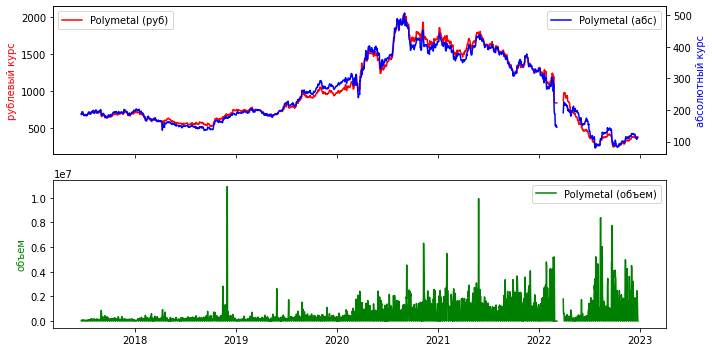

---------------------------------------- TCS-гдр ----------------------------------------


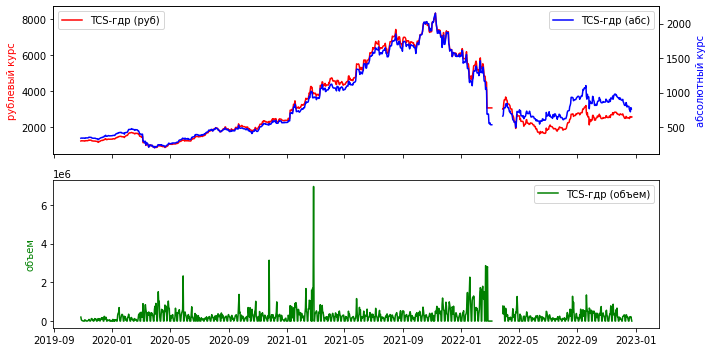

---------------------------------------- TRUR ETF ----------------------------------------


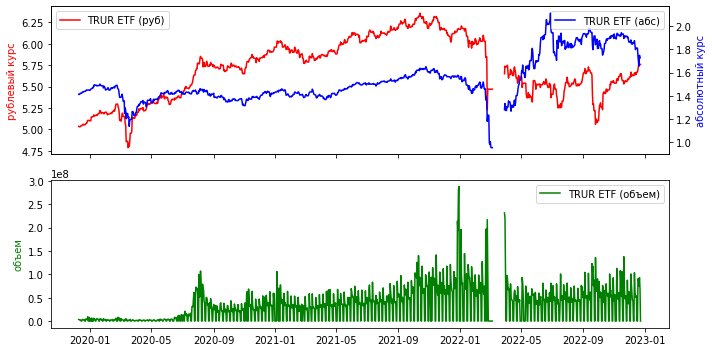

---------------------------------------- VK-гдр ----------------------------------------


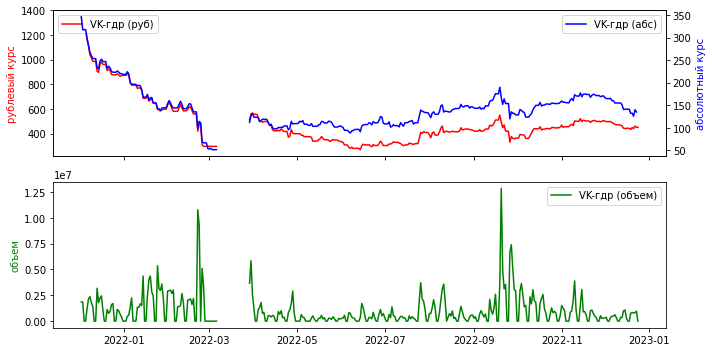

---------------------------------------- Yandex clA ----------------------------------------


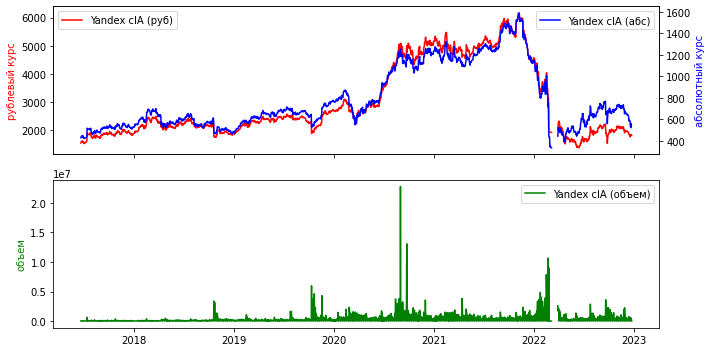

---------------------------------------- АЛРОСА ао ----------------------------------------


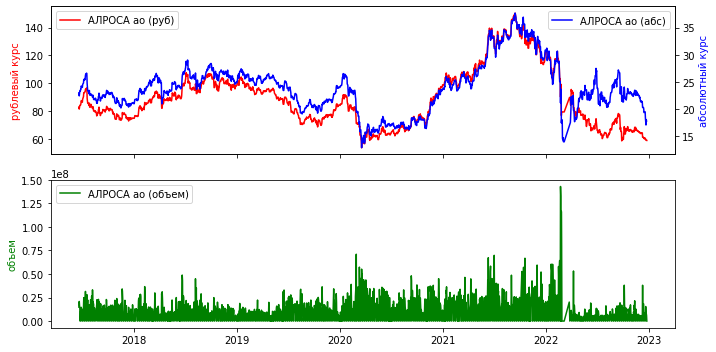

---------------------------------------- ВТБ ао ----------------------------------------


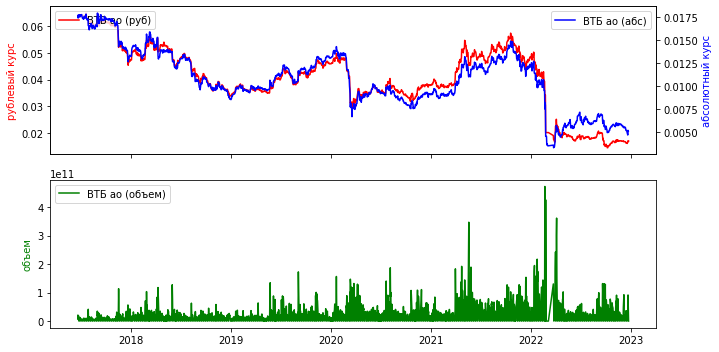

---------------------------------------- ГАЗПРОМ ао ----------------------------------------


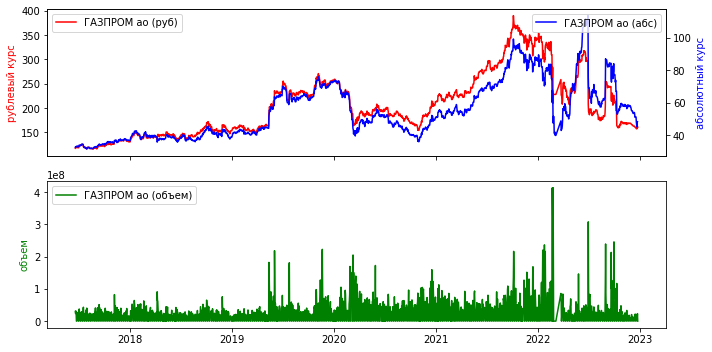

---------------------------------------- ГМКНорНик ----------------------------------------


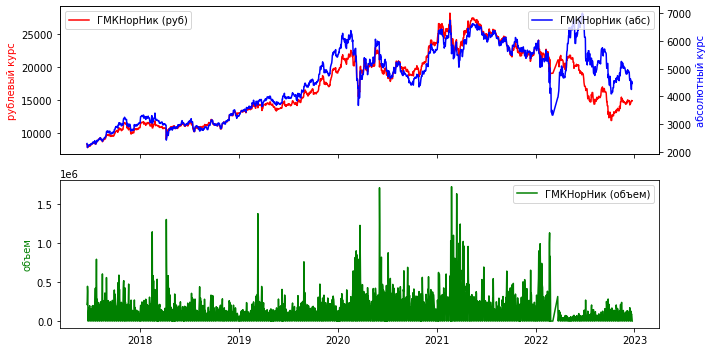

---------------------------------------- ДетскийМир ----------------------------------------


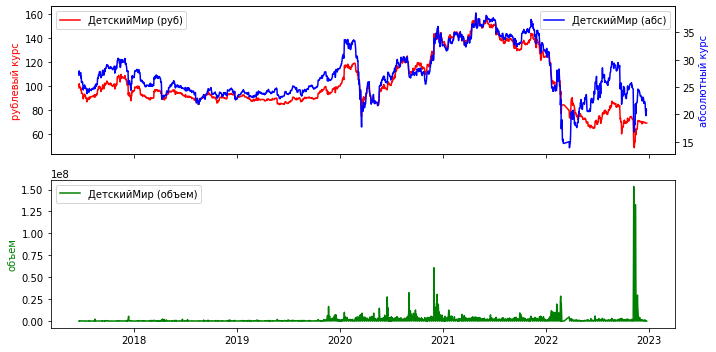

---------------------------------------- ЛУКОЙЛ ----------------------------------------


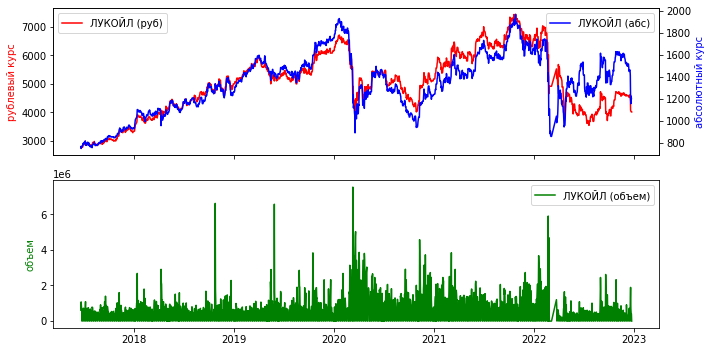

---------------------------------------- МКБ ао ----------------------------------------


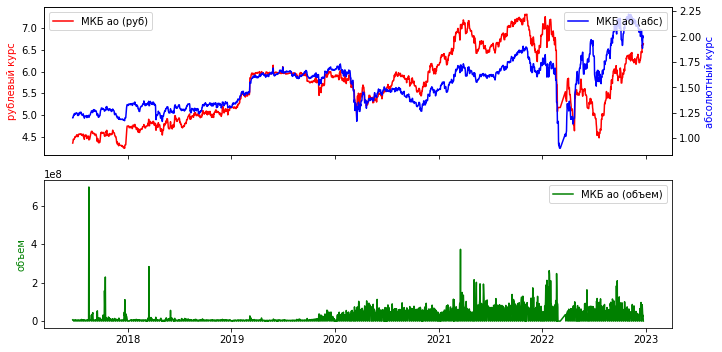

---------------------------------------- ММК ----------------------------------------


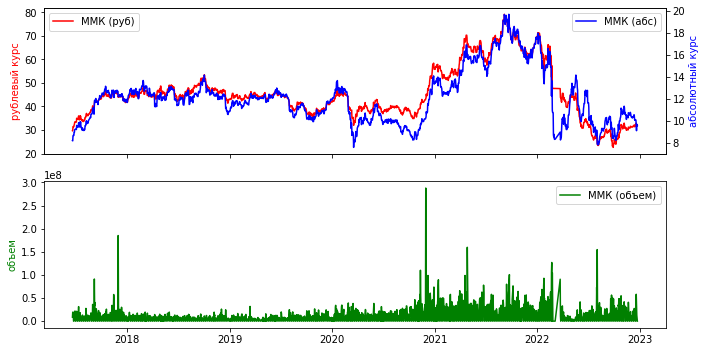

---------------------------------------- Магнит ао ----------------------------------------


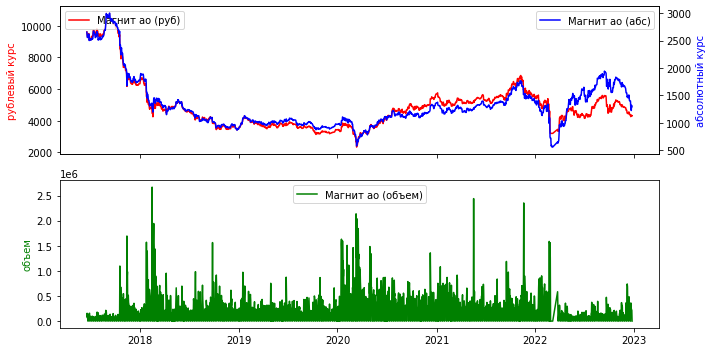

---------------------------------------- НЛМК ао ----------------------------------------


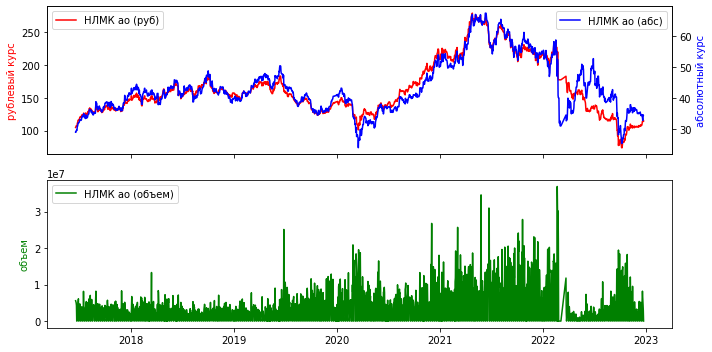

---------------------------------------- Новатэк ао ----------------------------------------


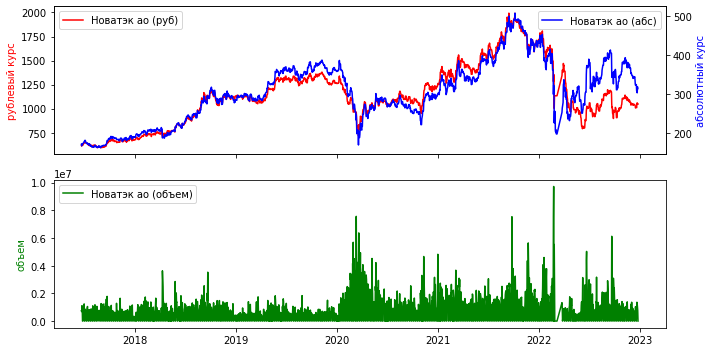

---------------------------------------- Полюс ----------------------------------------


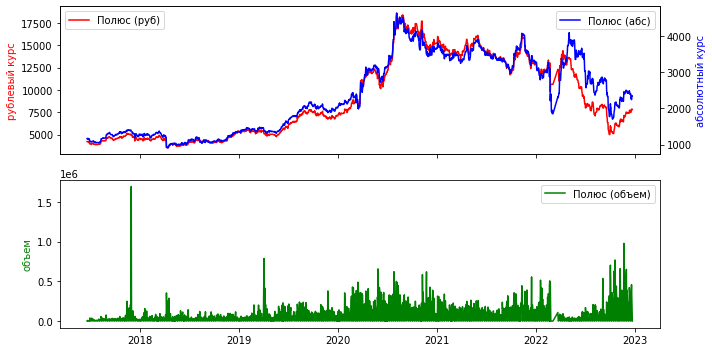

---------------------------------------- РУСАЛ ао ----------------------------------------


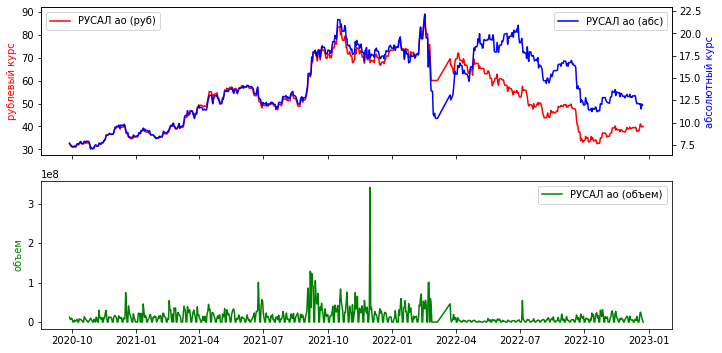

---------------------------------------- Роснефть ----------------------------------------


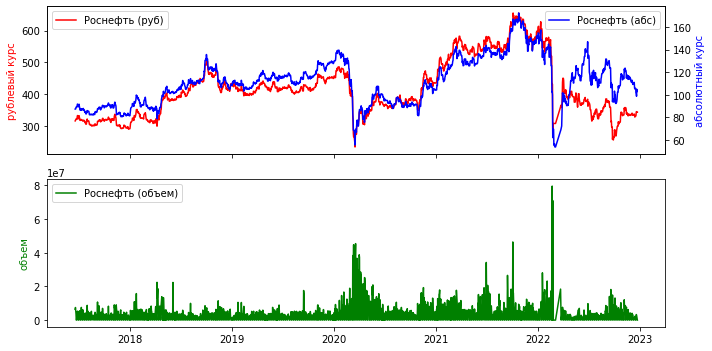

---------------------------------------- Сбербанк ----------------------------------------


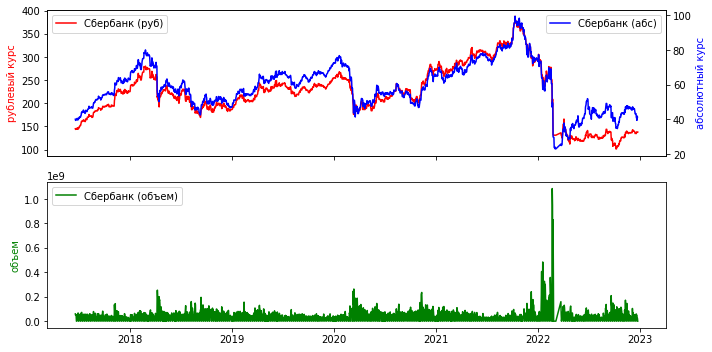

---------------------------------------- Сбербанк-п ----------------------------------------


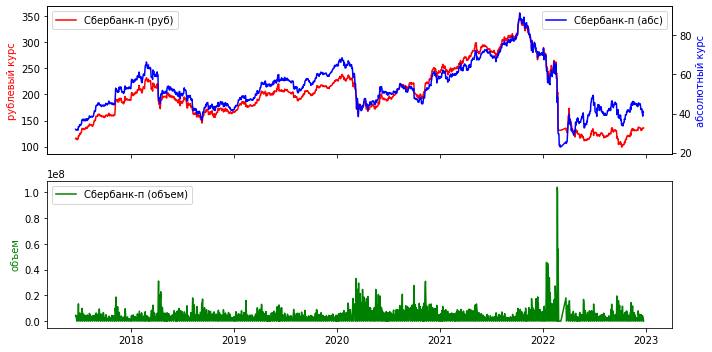

---------------------------------------- СевСт-ао ----------------------------------------


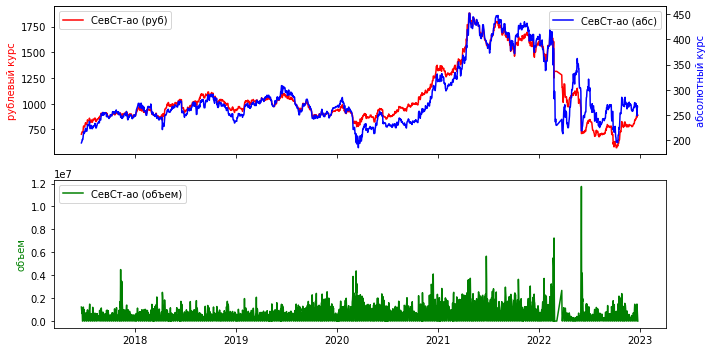

---------------------------------------- Сургнфгз ----------------------------------------


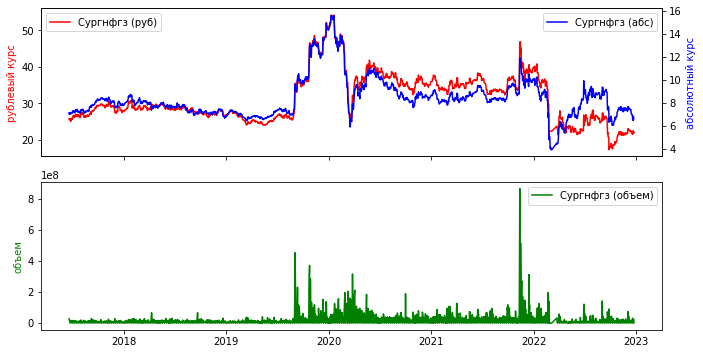

---------------------------------------- Сургнфгз-п ----------------------------------------


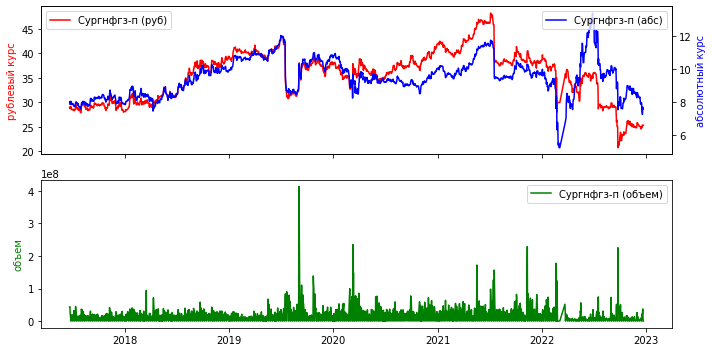

---------------------------------------- ФосАгро ао ----------------------------------------


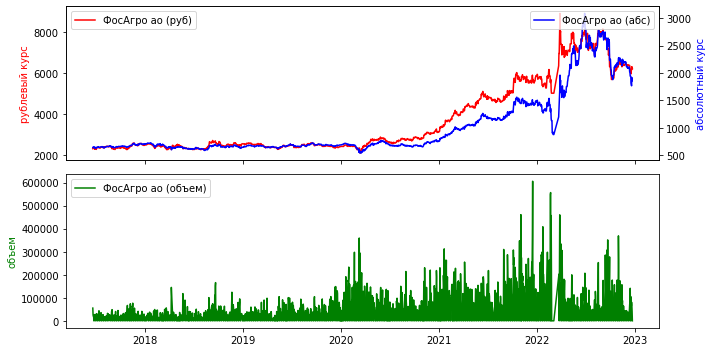

In [2]:
import matplotlib.pyplot as plt

for name in s_abscur.columns:
    
    print('-'*40,name,'-'*40)
    
    fig = plt.figure(figsize=(10,5))
    
    ax = fig.subplots(2,1,sharex=True)
    
    ax[0].set_ylabel('рублевый курс', color = 'red') 
    ax[0].plot(s_close[name], color = 'red',label = name + ' (руб)') 
    ax[0].legend(loc=2)
    
    ax2 = ax[0].twinx()
    ax2.set_ylabel('абсолютный курс',color = 'blue')
    ax2.plot(s_abscur[name],color = 'blue',label= name + ' (абс)')
    ax2.legend(loc=1)
    
    ax[1].plot(s_vol[name],color = 'green', label = name + ' (объем)')
    ax[1].set_ylabel('объем', color = 'green')
    ax[1].legend()
    
    fig.tight_layout()
    
    plt.show()
    
#     break